# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an SArray and a degree and return an SFrame where each column is the SArray to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the SArray column 2 is the SArray squared and column 3 is the SArray cubed
* Use matplotlib to visualize polynomial regressions
* Use matplotlib to visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks.

# Fire up graphlab create

In [2]:
import graphlab as gl

**1.** You’re going to write a function that adds powers of a feature to columns of a data frame. 

Write a polynomial function that takes an SArray and a maximal degree and returns an SFrame with columns containing the SArray to all the powers up to the maximal degree.

The easiest way to apply a power to an SArray is to use the .apply() and lambda x: functions. 
For example to take the example array and compute the third power we can do as follows: (note running this cell the first time may take longer than expected since it loads graphlab)

In [3]:
tmp = gl.SArray([1., 2., 3.])
# tmp =  sf.SArray([1., 2., 3.])
# a simple SArray/list containing items [1.0, 2.0, 3.0]

tmp_cubed = tmp.apply(lambda x: x**3)
print tmp
print tmp_cubed

This non-commercial license of GraphLab Create for academic use is assigned to vinorda@gmail.com and will expire on June 04, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1471345667.log


[1.0, 2.0, 3.0]
[1.0, 8.0, 27.0]


We can create an empty SFrame using gl.SFrame() and then add any columns to it with ex_sframe['column_name'] = value. For example we create an empty SFrame and make the column 'power_1' to be the first power of tmp (i.e. tmp itself).

In [4]:
ex_sframe = gl.SFrame()
#ex_sframe = sf.SFrame()
ex_sframe['power_1'] = tmp
print ex_sframe

+---------+
| power_1 |
+---------+
|   1.0   |
|   2.0   |
|   3.0   |
+---------+
[3 rows x 1 columns]



# Polynomial_sframe function

**2.** Write your own function called ‘polynomial_sframe’ (or otherwise) which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame (e.g. SFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.
Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up to a specific degree:

In [5]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    
    # create and initialize a new empty SFrame:
    poly_sframe = gl.SFrame()
    
    # create a new column/feature 'power_1' and 
    # set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            
            # then assign poly_sframe[name] to the appropriate power of feature
            # poly_sframe[name] = feature.apply(lambda x: x**power)
            poly_sframe[name] = poly_sframe['power_1'].apply(lambda x: x**power)
            #poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe  #returns the sframe created

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [6]:
print tmp
tmp_cube = polynomial_sframe(tmp, 3)
print tmp_cube

[1.0, 2.0, 3.0]
+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



# Visualizing polynomial regression

**3**. 
For the remainder of the assignment we will be working with the house Sales data as in the previous notebooks. Load in the data and also sort the sales SFrame by ‘sqft_living’. When we plot the fitted values we want to join them up in a line and this works best if the variable on the X-axis (which will be ‘sqft_living’) is sorted. For houses with identical square footage, we break the tie by their prices.

Then we will use matplotlib to visualize what a polynomial regression looks like on some real data.

In [7]:
sales = gl.SFrame('../Week2/kc_house_data.gl/')

#dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
#sales = sf.SFrame.read_csv('../Week2/kc_house_data.csv', column_type_hints = dtype_dict)

As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

**4.** Make a 1 degree polynomial SFrame with sales[‘sqft_living’] as the the feature. Call it ‘poly1_data’.

**5.** Add sales[‘price’] to poly1_data as this will be our output variable. e.g. if you’re using SFrames

Let's start with a degree 1 polynomial using 'sqft_living' (i.e. a line) to predict 'price' and plot what it looks like.

In [8]:
sales = sales.sort(['sqft_living', 'price'])

In [9]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price'] # add price to the data since it's the target
poly1_data.head(2)

power_1,price
290.0,142000.0
370.0,276000.0


**6.** Use gl.linear_regression.create (or another linear regression library) to compute the regression weights for predicting sales[‘price’] based on the 1 degree polynomial feature ‘sqft_living’. The result should be an intercept and slope. e.g if you’re using graphlab create:


NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users. This way you will get the same answer every time you run the code.

In [10]:
model1 = gl.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)

# ToolkitError: Input training dataset is not an SFrame. If it is a Pandas DataFrame, you may use the to_sframe() function to convert it to an SFrame.

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.032140     | 4362074.696077     | 261440.790724 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [11]:
#let's take a look at the weights before we plot
model1.get("coefficients")

name,index,value,stderr
(intercept),None,-43579.0852515,4402.68969743
power_1,None,280.622770886,1.93639855513


**7.** Next use the produce a scatter plot of the training data (just square feet vs price) and add the fitted model. e.g. with matplotlib and SFrames:

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

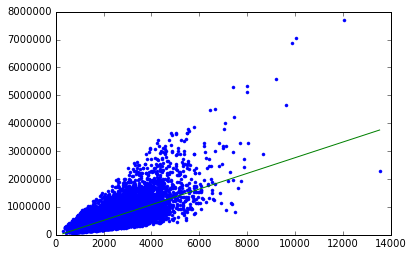

In [13]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data),'-')

Let's unpack that plt.plot() command. The first pair of SArrays we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

The resulting plot should look like a cloud of points with a straight line passing through.

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

**8.** Now that you have plotted the results using a 1st degree polynomial, try it again using a 2nd degree and 3rd degree polynomial. Look at the fitted lines, do they appear as you would expect?

In [14]:
poly2_data = polynomial_sframe(sales['sqft_living'], 2)
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
model2 = gl.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.048165     | 5913020.984255     | 250948.368758 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [15]:
model2.get("coefficients")

name,index,value,stderr
(intercept),None,199222.496445,7058.00483552
power_1,None,67.9940640677,5.28787201316
power_2,None,0.0385812312789,0.000898246547032


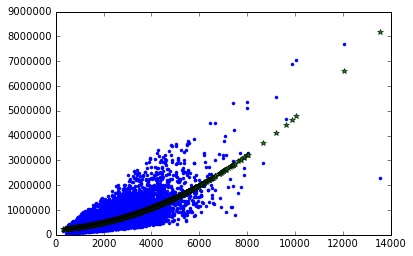

In [16]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(poly2_data),'*')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [17]:
poly3_data = polynomial_sframe(sales['sqft_living'], 3)
my_features = poly3_data.column_names() # get the name of the features
print "My features are now this list", my_features
poly3_data['price'] = sales['price'] # add price to the data since it's the target
print "Giving us this new sframe\n", poly3_data.head(2)
model3 = gl.linear_regression.create(poly3_data, target = 'price', features = my_features, validation_set = None)

My features are now this list ['power_1', 'power_2', 'power_3']
Giving us this new sframe
+---------+----------+------------+----------+
| power_1 | power_2  |  power_3   |  price   |
+---------+----------+------------+----------+
|  290.0  | 84100.0  | 24389000.0 | 142000.0 |
|  370.0  | 136900.0 | 50653000.0 | 276000.0 |
+---------+----------+------------+----------+
[2 rows x 4 columns]



Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 3

Number of unpacked features : 3

Number of coefficients    : 4

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.073009     | 3261066.736007     | 249261.286346 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [18]:
model3.get("coefficients")

name,index,value,stderr
(intercept),None,336788.117952,10661.0153713
power_1,None,-90.1476236119,10.6222891844
power_2,None,0.087036715081,0.00296630623148
power_3,None,-3.8398521196e-06,2.2417490959e-07


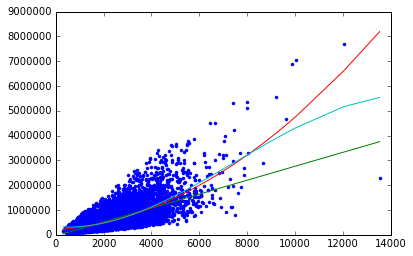

In [19]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model1.predict(poly1_data),'-', 
        poly2_data['power_1'], model2.predict(poly2_data),'-',
        poly2_data['power_1'], model3.predict(poly3_data),'-',)

**9.** Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [20]:
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
my_features = poly15_data.column_names() # get the name of the features
print "My features are now this list", my_features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
print "Giving us this new sframe\n", poly15_data.head(2)

model15 = gl.linear_regression.create(poly15_data, target = 'price', features = my_features, validation_set = None)

My features are now this list ['power_1', 'power_2', 'power_3', 'power_4', 'power_5', 'power_6', 'power_7', 'power_8', 'power_9', 'power_10', 'power_11', 'power_12', 'power_13', 'power_14', 'power_15']
Giving us this new sframe
+---------+----------+------------+---------------+---------------+
| power_1 | power_2  |  power_3   |    power_4    |    power_5    |
+---------+----------+------------+---------------+---------------+
|  290.0  | 84100.0  | 24389000.0 |  7072810000.0 | 2.0511149e+12 |
|  370.0  | 136900.0 | 50653000.0 | 18741610000.0 | 6.9343957e+12 |
+---------+----------+------------+---------------+---------------+
+-----------------+------------------+-------------------+-------------------+
|     power_6     |     power_7      |      power_8      |      power_9      |
+-----------------+------------------+-------------------+-------------------+
|  5.94823321e+14 | 1.7249876309e+17 | 5.00246412961e+19 | 1.45071459759e+22 |
| 2.565726409e+15 | 9.4931877133e+17 | 3.5124794

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.029924     | 2662308.584342     | 245690.511190 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

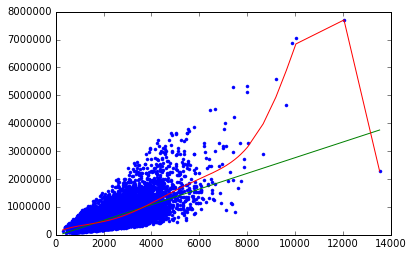

In [21]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
        poly1_data['power_1'], model1.predict(poly1_data),'-',
        poly1_data['power_1'], model15.predict(poly15_data),'-')

* What do you think of the 15th degree polynomial?
Fits the data too hard - overfitting.

* Do you think this is appropriate? 
No, its not, even though this gives the lowest Training-rmse.

* If we were to change the data do you think you'd get pretty much the same curve? 
No, if we change the data, the curve will change, i.e model will change a lot - thus high variance between models by just changing a few data points. NOte bias will be low because generally a complex model, like a 15th order polynomial will overfit data, i.e RSS will be low.

# Changing the data and re-learning

**10.** We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.
* You should have 4 subsets of (approximately) equal size, call them set_1, set_2, set_3, and set_4

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. If you’re not using SFrames then please download the provided csv files for each subset.

In [22]:
(splitA, splitB) = sales.random_split(0.5, seed=0)
(split1, split2) = splitA.random_split(0.5, seed=0)
(split3, split4) = splitB.random_split(0.5, seed=0)
print split1['id', 'sqft_living', 'price'].head(2)
print split2['id', 'sqft_living', 'price'].head(2)
print split3['id', 'sqft_living', 'price'].head(2)
print split4['id', 'sqft_living', 'price'].head(2)

+------------+-------------+----------+
|     id     | sqft_living |  price   |
+------------+-------------+----------+
| 8658300340 |    430.0    | 80000.0  |
| 1352300580 |    460.0    | 247000.0 |
+------------+-------------+----------+
[2 rows x 3 columns]

+------------+-------------+----------+
|     id     | sqft_living |  price   |
+------------+-------------+----------+
| 6896300380 |    390.0    | 228000.0 |
| 6303400395 |    410.0    | 325000.0 |
+------------+-------------+----------+
[2 rows x 3 columns]

+------------+-------------+----------+
|     id     | sqft_living |  price   |
+------------+-------------+----------+
| 9266700190 |    390.0    | 245000.0 |
| 0745000005 |    480.0    | 145000.0 |
+------------+-------------+----------+
[2 rows x 3 columns]

+------------+-------------+----------+
|     id     | sqft_living |  price   |
+------------+-------------+----------+
| 3980300371 |    290.0    | 142000.0 |
| 2856101479 |    370.0    | 276000.0 |
+------------+

**11.** Estimate a 15th degree polynomial on all 4 sets, plot the results and view the coefficients for all four models.
Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

In [23]:
poly_split1_data = polynomial_sframe(split1['sqft_living'], 15)
my_features = poly_split1_data.column_names() # get the name of the features
#print "My features are now this list", my_features
poly_split1_data['price'] = split1['price'] # add price to the data since it's the target
#print "Giving us this new sframe\n", poly15_data.head(2)
model_split1 = gl.linear_regression.create(poly_split1_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.038370     | 2195218.932304     | 248858.822200 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [24]:
poly_split2_data = polynomial_sframe(split2['sqft_living'], 15)
my_features = poly_split2_data.column_names() # get the name of the features
#print "My features are now this list", my_features
poly_split2_data['price'] = split2['price'] # add price to the data since it's the target
#print "Giving us this new sframe\n", poly15_data.head(2)
model_split2 = gl.linear_regression.create(poly_split2_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.050171     | 2069212.978547     | 234840.067186 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [25]:
poly_split3_data = polynomial_sframe(split3['sqft_living'], 15)
my_features = poly_split3_data.column_names() # get the name of the features
#print "My features are now this list", my_features
poly_split3_data['price'] = split3['price'] # add price to the data since it's the target
#print "Giving us this new sframe\n", poly15_data.head(2)
model_split3 = gl.linear_regression.create(poly_split3_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.042584     | 2269769.506523     | 251460.072754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [26]:
poly_split4_data = polynomial_sframe(split4['sqft_living'], 15)
my_features = poly_split4_data.column_names() # get the name of the features
#print "My features are now this list", my_features
poly_split4_data['price'] = split4['price'] # add price to the data since it's the target
#print "Giving us this new sframe\n", poly15_data.head(2)
model_split4 = gl.linear_regression.create(poly_split4_data, target = 'price', features = my_features, validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 15

Number of unpacked features : 15

Number of coefficients    : 16

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.046494     | 2314893.173824     | 244563.136754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Some questions you will be asked on your quiz:

**Quiz Question: Is the sign (positive or negative) for power_15 the same in all four models?**

No 
+-------------+-+-----------------+ 
| name | | value | 
+-------------+--+----------------+ 
model_split1 = power_15 | 5.0197523267e-55
model_split2 = power_15 | 1.68636658317e-52 
model_split3 = power_15 | 6.39045885912e-53 
model_split4 = power_15 | -4.74535333122e-51

In [27]:
#model_split1.get('coefficients')
#model_split1.coefficients.print_rows(16) 
model_split4.coefficients.print_rows(num_rows=16, num_columns=3)

+-------------+-------+--------------------+-----+
|     name    | index |       value        | ... |
+-------------+-------+--------------------+-----+
| (intercept) |  None |   259020.879447    | ... |
|   power_1   |  None |   -31.7277161932   | ... |
|   power_2   |  None |   0.109702769609   | ... |
|   power_3   |  None | -1.58383847314e-05 | ... |
|   power_4   |  None | -4.47660623787e-09 | ... |
|   power_5   |  None | 1.13976573478e-12  | ... |
|   power_6   |  None | 1.97669120543e-16  | ... |
|   power_7   |  None | -6.15783678607e-21 | ... |
|   power_8   |  None | -4.88012304096e-24 | ... |
|   power_9   |  None | -6.6218678116e-28  | ... |
|   power_10  |  None | -2.70631583575e-32 | ... |
|   power_11  |  None | 6.72370411717e-36  | ... |
|   power_12  |  None | 1.74115646286e-39  | ... |
|   power_13  |  None |  2.0918837573e-43  | ... |
|   power_14  |  None | 4.78015565447e-48  | ... |
|   power_15  |  None | -4.74535333059e-51 | ... |
+-------------+-------+--------

**Quiz Question: (True/False) the plotted fitted lines look the same in all four plots**

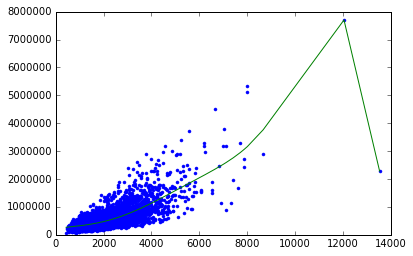

In [28]:
plt.plot(poly_split1_data['power_1'],poly_split1_data['price'],'.',
        poly_split1_data['power_1'], model_split1.predict(poly_split1_data),'-')

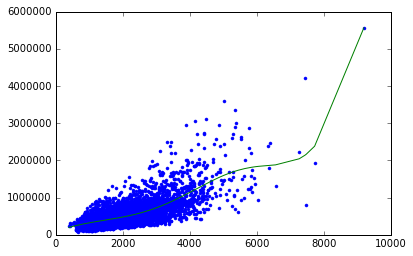

In [29]:
plt.plot(poly_split2_data['power_1'],poly_split2_data['price'],'.',
        poly_split2_data['power_1'], model_split2.predict(poly_split2_data),'-')

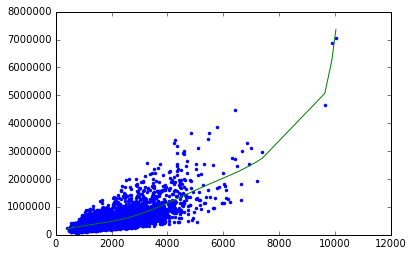

In [30]:
plt.plot(poly_split3_data['power_1'],poly_split3_data['price'],'.',
        poly_split3_data['power_1'], model_split3.predict(poly_split3_data),'-')

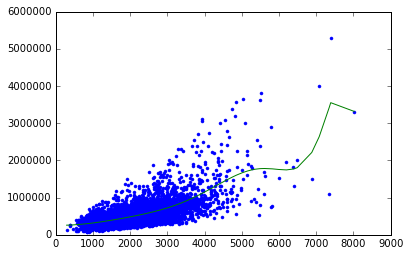

In [31]:
plt.plot(poly_split4_data['power_1'],poly_split4_data['price'],'.',
        poly_split4_data['power_1'], model_split4.predict(poly_split4_data),'-')

The polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. **The model has high variance**. We will see in next weeks lectures that ridge regression reduces such variance although with a tolerable increase in bias. We can say that a degree 15 polynomial model is complex model, increased complexity leads to more flexible model, i.e model that fits the data exceedingly well ie. overfit so bias is very low but as we saw from the plots of the 4 different degree 15 polynomial model fit to the data, the models that are defined by the weights or coefficients of the 15 features vary wildely thus displays high variance.

# Selecting a Polynomial Degree using Cross Validation

**14.** Since the “best” polynomial degree is unknown to us we will use cross validation to select the best degree. 

Whenever we have a "magic" parameter like the degree of the polynomial, there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users. If you’re not using SFrames then please download the provided csv files for training, validation and test data.

In [32]:
# 90% train/validate, testing 10% of data
(training_and_validation,testing) = sales.random_split(0.9, seed=1)  

# further split train_validate into 50% train, 50% validation sets
(training,validation) = training_and_validation.random_split(0.5, seed=1) 

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for gl.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

In [33]:
RSS = list()  #or =[]

for degree in range(1, 15+1):
    #print "Doing degree", degree,"polynomial"
    poly_data = polynomial_sframe( training['sqft_living'], degree )
    my_features = poly_data.column_names() # get the name of the features
    poly_data['price'] = training['price'] # add price to the data since it's the target
    
    # train the model using training data
    poly_model = gl.linear_regression.create(poly_data, target = 'price', 
                                             features = my_features, 
                                             validation_set = None, verbose = False)
    # make predictions using validation data
    predictions = poly_model.predict(validation)
    
    # residuals = actual outcome in validation set - predictions on validation set 
    residuals = validation['price'] - predictions
    
    RSS.append( (residuals**2).sum() )

In [34]:
print "Lowest RSS = ", min(RSS), " Degree of polynomial that gives lowest RSS =", RSS.index(min(RSS)) + 1

Lowest RSS =  1.32798505599e+15  Degree of polynomial that gives lowest RSS = 3


**Quiz Question: Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

As we saw above, a degree 2 polynomial gives lowest RSS on validation data.

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data. Report the RSS on your quiz.

In [35]:
poly2_data = polynomial_sframe( training['sqft_living'], 2 )
my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = training['price'] # add price to the data since it's the target
poly2_model = gl.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

predictions = poly2_model.predict(testing)
residuals = testing['price'] - predictions
test_RSS =  (residuals**2).sum()
print test_RSS


Linear regression:

--------------------------------------------------------

Number of examples          : 9761

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.028810     | 4869005.244131     | 255076.149120 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

2.5290157284e+14


**Quiz Question: what is the RSS on TEST data for the model with the degree selected from Validation data?**  

2.84718943414e+14

1.22250685197e+15  - was the lowest RSS on validation data